In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import netCDF4 as cdf
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar

In [3]:
labels = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-d']
labels2 = ['FINN','FINN_2']

biofireparamdirs=[
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/',
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/',
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/', #FINN
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-3h-fires-monthly-bio/', #CASA-GFED4 fires 3h
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/'#CASA-GFED4 fires daily
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires_2'
]


In [4]:
fac = 86400.*365.*12./1.e15
glarea = globarea(im=360,jm=180)

In [5]:
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
mask = mf.variables['regionmask'][:]

<matplotlib.colorbar.Colorbar instance at 0x111f57ef0>

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


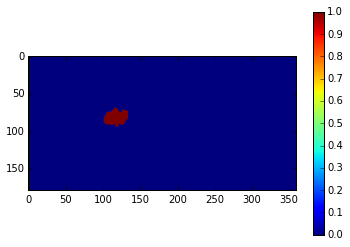

In [6]:
imshow(mask)
colorbar()

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010
2011
2012


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/
2010
2011
2012
2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/
2010
2011
2012
2013
2014
2015


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/ma/core.py:4139: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
2010
2011
2012
2013
2014
2015


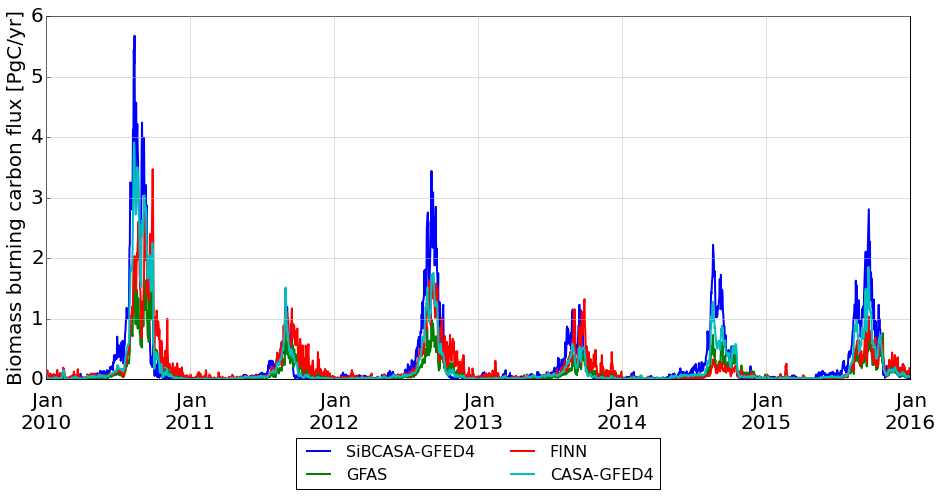

In [7]:
####################################################   Daily Time Series  #########################################################

fig = plt.figure(1,figsize=(15,8))
#ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016

for ii,dirbf in enumerate(biofireparamdirs):
    alltimes = []
    allbb = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        for fname in os.listdir(dirbf):
            #print fname
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            #print bf
            if 'co2fire' in bf.variables.keys():
                bb = np.float32(bf.variables['co2fire'][:])
            else: bb = bf.variables['bb'][:]
            m = int(fname[-5:-3])
            days = calendar.monthrange(y,m)[1]
            for d in range(1,days+1):
                dd = dt.datetime(y,m,d,0,0)
                alltimes.append(dd)
                bb_day = bb[(d-1)*8:d*8,:,:].mean(axis=0)
                allbb.append((bb_day*mask*glarea*fac).sum()) 
            #print max(allbb)
            #print shape(alltimes), shape(allbb)
            
    ax.plot(alltimes,allbb,label=labels[ii],lw=2)
ax.set_ylim(0,6)    
ax.set_xlim(dt.date(2010,1,1),dt.date(2016,1,1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Biomass burning carbon flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
fig.savefig('Fig1_Daily_fires_2010-2016.png')

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [0.54114672321138968, 0.10119378920943195, 0.33480545958150526, 0.14893017473739084, 0.23316721876324598, 0.31922607478178222]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/
2010
2011
2012
2013
2014


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:36: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


2015
[2010, 2011, 2012, 2013, 2014, 2015] [0.24118774318110184, 0.080941746398435252, 0.10967845333825735, 0.057663255661396642, 0.088107641591578148, 0.11728744763346526]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [0.41049761911300525, 0.17320959737161892, 0.23819425286540594, 0.15198494826424563, 0.051463678365706658, 0.15854245406287998]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [0.4674972354212833, 0.095588970539156742, 0.19577337172603049, 0.082608792019116264, 0.15009431388957883, 0.19919875957745675]


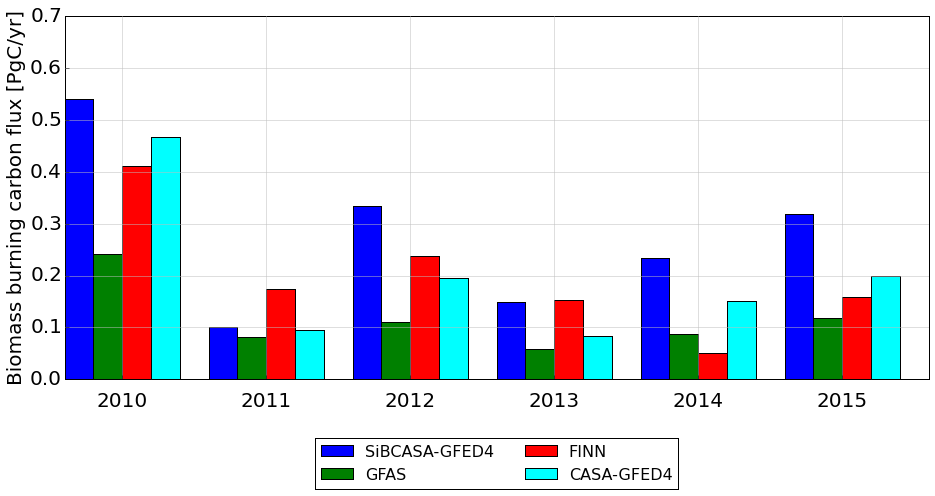

In [8]:
################################################ Yearly Values ##############################################################

fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016
bar_width = 0.2
colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

for ii,dirbf in enumerate(biofireparamdirs):
    alltimes = []
    allbb = []
    #cont = 1
    print dirbf
    for y in range(minyear,maxyear):
        print y
        if calendar.isleap(y):
            days_in_y = 366
        else: 
            days_in_y = 365
        for fname in os.listdir(dirbf):
            
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            if 'co2fire' in bf.variables.keys():
                bb = np.float32(bf.variables['co2fire'][:])
            else: 
                bb = bf.variables['bb'][:]
            if bb.shape[0] == 180: #add time dimension
                bb.resize(1,180,360)  
            try: 
                bb[bb.mask] = 0
                bb = np.array(bb)
            except: pass    
            if int(fname[-5:-3]) == 1: 
                bb_sum = bb
            else: bb_sum = np.append(bb_sum,bb,axis=0) # revise syntax of append
            bf.close()
        
        bb_sum = bb_sum.mean(axis=0) # Am I taking the annual average here for each grid box? Yes
        bb_year = (bb_sum*mask*glarea*fac).sum() #here i am adding the emissions and calculating them for the area
        allbb.append(bb_year)
        alltimes.append(y)
    
    print alltimes, allbb

    #ax.plot(alltimes,allbb,'o',markersize=8,label=labels[ii],lw=2) 
    index = np.array(alltimes)
    if ii == 0: ax.bar(index, allbb, bar_width, color='blue',label=labels[ii])
    if ii == 1: ax.bar(index+bar_width, allbb, bar_width, color='green',label=labels[ii])
    if ii == 2: ax.bar(index+bar_width*ii, allbb, bar_width, color='red',label=labels[ii])
    if ii == 3: ax.bar(index+bar_width*ii, allbb, bar_width, color='cyan',label=labels[ii])

plt.xticks(index + (bar_width*4 / 2), ('2010', '2011', '2012', '2013', '2014','2015'))    
ax.set_ylim(0,0.7)

#ax.set_xlim(2009,2016)
#ax.set_xticklabels(np.arange(2009,2016))
#ax.set_xlim(dt.date(2010,1,1),dt.date(2015,1,1))
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Biomass burning carbon flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]   
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
#fig.savefig('Fig2_Alt_YearlyValues_2010-2016.png')

In [7]:
# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Grasslands
'''
allbbexternal = [0.0159694278, 0.0344205812, 0.0375909534, 0.030181557, 0.0848221446, 0.137825707, 0.560151404, 
                 4.34526341, 2.04850581, 0.392333894, 0.0568107312, 0.000431179502, 0.00201221225, 0.000191968962, 
                 0.000136055896, 0.00275346978, 0.0450983475, 0.028652039, 0.128052913, 0.645386692, 0.738584067, 
                 0.0641633591, 0.0298392817, 0.0296351639, 0.03521452, 0.03393159, 0.05029262, 0.01150625, 0.06687955, 
                 0.04858148, 0.15062673, 1.1870409, 1.69067863, 0.14714553, 0.08014339, 0.02557558, 0.06074837, 
                 0.01625897, 0.07070668, 0.02733339, 0.05697758, 0.04583733, 0.10504358, 0.5960655, 0.55613184, 
                 0.06719321, 0.04243416, 0.0182261, 0.04584135, 0.01719947, 0.01932713, 0.01750817, 0.08400658, 
                 0.07538333, 0.09700453, 1.0030752, 0.80706796, 0.37652396, 0.06870215, 0.01580085, 0, 0, 0, 0, 0, 
                 0, 0, 0, 0, 0, 0, 0]

# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Savanna

allbbexternal2 = [0.0160454962, 0.0345033683, 0.0378562204, 0.0313127926, 0.0894826126, 0.151400322, 0.588750822, 
                  4.44883779, 2.15596221, 0.392938369, 0.0570928801, 0.00048041219, 0.00217165297, 0.000197191088, 
                  0.000156304333, 0.00285314341, 0.0468503895, 0.0322755466, 0.134289419, 0.661823084, 0.77076409,
                  0.0642055861, 0.0298709944, 0.0296622025, 0.03539644, 0.03409886, 0.05085012, 0.01183867, 0.06809951, 
                  0.05170155, 0.16277228, 1.23471135, 1.77469012, 0.16618062, 0.08038368, 0.02571694, 0.06095043, 0.01649677,
                  0.07133516, 0.02763954, 0.05796219, 0.04798216, 0.11195157, 0.61803966, 0.58870163, 0.07319344, 0.04268511,
                  0.01836218, 0.04606281, 0.01735455, 0.0198013, 0.01790767, 0.08533929, 0.07942735, 0.10564409, 1.03614035, 
                  0.85019506, 0.39906415, 0.06930807, 0.01615711, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
'''
# Erik runs
# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Grasslands
allbbexternal = [0.0176297462, 0.0369025687, 0.0397115853, 0.0321304056, 0.0895200822, 0.14944365, 0.598962862, 
                 4.58473819, 2.14742456, 0.412068465, 0.0577464935, 0.000443432943, 0.00205530692, 0.000199283834, 
                 0.000155353361, 0.0029146965, 0.0468479526, 0.0299818508, 0.138191966, 0.683008905, 0.781793337, 
                 0.0664116652, 0.0311318561, 0.0300646085, 0.03554661, 0.03451252, 0.05314641, 0.01212317, 0.06952327, 
                 0.05071606, 0.15712503, 1.23048123, 1.76126215, 0.14980209, 0.07652076, 0.02553949, 0.0617966, 
                 0.01675574, 0.07433982, 0.02831906, 0.05951552, 0.0476639, 0.10927668, 0.62195126, 0.58049067, 
                 0.06909347, 0.04286508, 0.01834073, 0.04596724, 0.01730582, 0.02041818, 0.01825333, 0.0876005, 
                 0.07833372, 0.10113912, 1.03831803, 0.83788829, 0.38138424, 0.06670083, 0.01580882, 0.03226169, 
                 0.03448986, 0.04620623, 0.00463449, 0.07424596, 0.08131232, 0.12240895, 0.81639022, 1.69881477, 
                 0.71466985, 0.32696097, 0.10367783]


# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Savanna
allbbexternal2 = [0.0177073048, 0.0369870065, 0.0399804598, 0.0332738571, 0.0942509443, 0.163155864, 0.627854668, 
                  4.68967599, 2.25590685, 0.412681744, 0.0580319511, 0.000493218021, 0.00221812393, 0.000204616694, 
                  0.000175789477, 0.003015363, 0.0486194462, 0.0336470263, 0.144488467, 0.69961626, 0.814259529, 
                  0.066454391, 0.0311640342, 0.0300926449, 0.03573229, 0.03468227, 0.05371097, 0.01245879, 0.07075304, 
                  0.05386537, 0.16937623, 1.27855863, 1.8460709, 0.16899961, 0.07676424, 0.02568211, 0.06200193, 
                  0.01699707, 0.07497519, 0.02862805, 0.06050768, 0.04982717, 0.11624631, 0.64424251, 0.61332797, 
                  0.07515468, 0.04311987, 0.01847897, 0.04619242, 0.01746372, 0.02089833, 0.0186559, 0.08894381, 
                  0.08241035, 0.10984363, 1.07159115, 0.88134624, 0.40415079, 0.06731217, 0.01616864, 0.03278147, 
                  0.03497258, 0.04660443, 0.00470141, 0.07557391, 0.084842, 0.12856178, 0.83717591, 1.75589014, 
                  0.74633756, 0.32979811, 0.10499348]

merged_external = [allbbexternal,allbbexternal2]

print allbbexternal2[0]*1000

17.7073048


/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010
2011
2012
2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/
2010
2011
2012
2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/
2010
2011
2012
2013
2014
2015
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
2010
2011
2012
2013
2014
2015


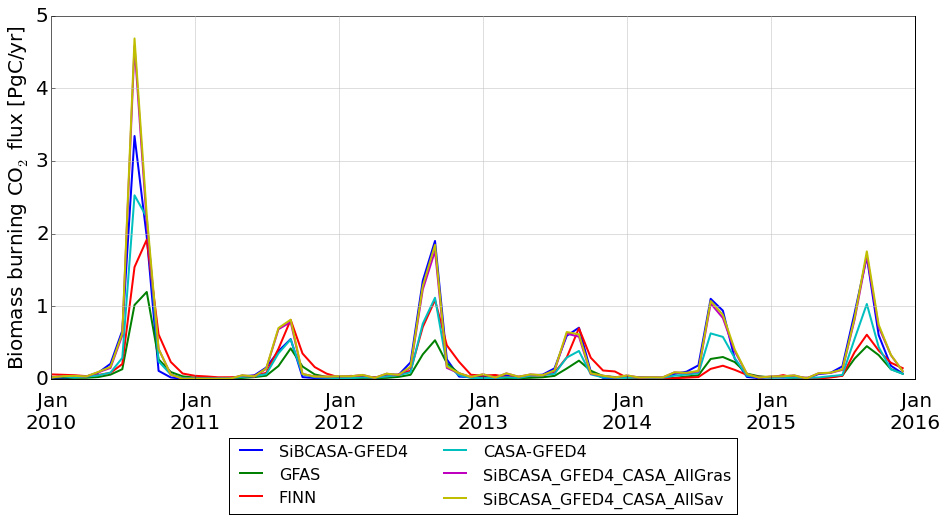

In [9]:
# Monthly time series

fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016

for ii,dirbf in enumerate(biofireparamdirs):
    cont = 0
    alltimes = []
    allbb = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        for fname in os.listdir(dirbf):
            #print fname
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            #print bf
            if 'co2fire' in bf.variables.keys():
                bb = np.float32(bf.variables['co2fire'][:])
            else: bb = bf.variables['bb'][:]
            m = int(fname[-5:-3]) 
            month = dt.date(y,m,1)
            bb_month = bb.mean(axis=0)
            alltimes.append(month)
            allbb.append((bb_month*mask*glarea*fac).sum())
            
    ax.plot(alltimes,allbb,label=labels[ii],lw=2)
    if ii == 3:
        lab = ['SiBCASA_GFED4_CASA_AllGras','SiBCASA_GFED4_CASA_AllSav']
        for q in range(2):
            allbb = merged_external[q]
            ax.plot(alltimes,allbb,label=lab[q],lw=2)
    
ax.set_ylim(0,5)    
ax.set_xlim(dt.date(minyear,1,1),dt.date(maxyear,1,1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Biomass burning CO$_2$ flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
fig.savefig('Monthly_Fires_2010-2016.png')

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [-0.3997573008513729, -0.40324179742973149, -0.60875603520463883, -0.35536659133423831, -0.52739126969613925, -0.68230234160546677]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [-0.3997573008513729, -0.40324179742973149, -0.60875603520463883, -0.35536659133423831, -0.52739126969613925, -0.68230234160546677]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013, 2014, 2015] [-0.3997573008513729, -0.40324179742973149, -0.60875603520463883, -0.35536659133423831, -0.52739126969613925, -0.68230234160546677]
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
2010
2011
2012
2013
2014
2015
[2010, 2011, 2012, 2013,

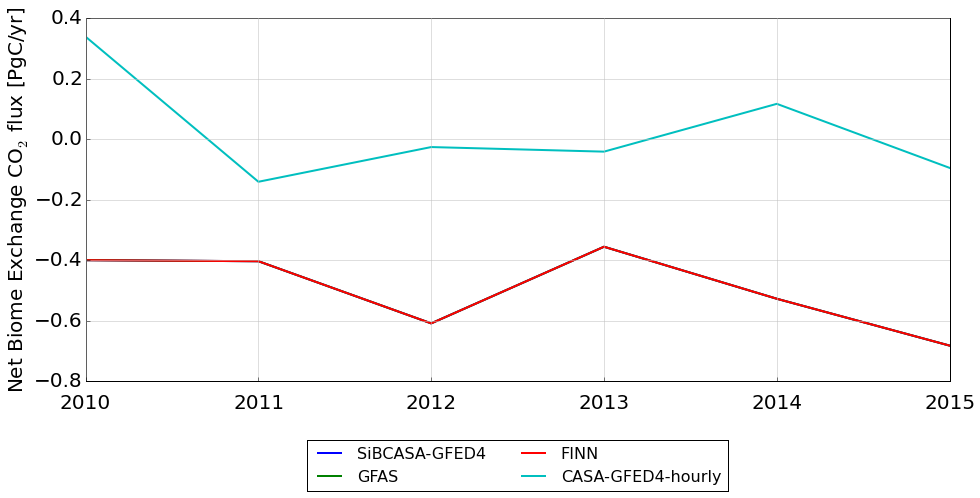

In [22]:
########################################## Net Biome Exchange for SiBCASA and CASA ###########################################

fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016

for ii,dirbf in enumerate(biofireparamdirs):
    alltimes = []
    allnep = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        for fname in os.listdir(dirbf):
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            if 'nep' in bf.variables.keys():
                nep = np.float32(bf.variables['nep'][:])
            if nep.shape[0] == 180: #add time dimension
                nep.resize(1,180,360)  
            try: 
                nep[nep.mask] = 0
                nep = np.array(nep)
            except: pass    
            if int(fname[-5:-3]) == 1: 
                nep_sum = nep
            else: nep_sum = np.append(nep_sum,nep,axis=0) 
            bf.close()
        
        nep_sum = nep_sum.mean(axis=0) # Am I taking the annual average here for each grid box? Yes
        nep_year = (nep_sum*mask*glarea*fac).sum() #here i am adding the emissions and calculating them for the area
        allnep.append(nep_year)
        alltimes.append(y)
    print alltimes, allnep
        
    ax.plot(alltimes,allnep,label=labels[ii],lw=2) 

ax.set_xlim(2010,2015)
ax.set_xticklabels(np.arange(2010,2016))
#ax.set_xlim(dt.date(2010,1,1),dt.date(2015,1,1))
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Net Biome Exchange CO$_2$ flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]   
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
fig.savefig('Fig5_NBE_2010-2016.png')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


<type 'numpy.ndarray'>
0.0 0.00026118991669
<type 'numpy.ndarray'>
0.0 0.000187136210941
0.0 0.00026118991669
<type 'numpy.ndarray'>


<matplotlib.colorbar.Colorbar instance at 0x10fd18ef0>

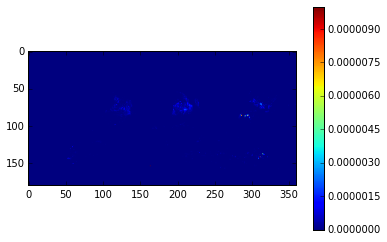

In [10]:
#Testing why there where strange values in FINN and GFAS files for 1 month
f=cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/biofireparams_sibcasa_ei_201409.nc')
bb=f.variables['co2fire'][:]
try: 
    bb[bb.mask] = 0
    bb = np.array(bb)
except: pass    
print type(bb)
print bb.min(), bb.max()
f2=cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/biofireparams_sibcasa_ei_201410.nc')
bb2=f2.variables['co2fire'][:]
try: 
    bb2[bb2.mask] = 0
    bb2 = np.array(bb2)
except: pass  
print type(bb2)

print bb2.min(), bb2.max()

bb_sum = np.append(bb,bb2,axis=0)
print bb_sum.min(), bb_sum.max()
print type(bb_sum)

imshow(bb_sum.mean(axis=0),vmin=0,vmax=0.000010)
colorbar()